In [1]:
import torch
import matplotlib.pyplot as plt
import non_local_boxes

# Sugar coating for reloading
%matplotlib inline
%load_ext autoreload
%autoreload 2

# in ordert to have unblurred pictures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Definitions

In [2]:
PNL = non_local_boxes.utils.P_NL
PL  = non_local_boxes.utils.P_L
PR = non_local_boxes.utils.PR

In [3]:
def game(Boolean_function):
    M = torch.zeros((4,4))
    for a in range(2):
        for b in range(2):
            for x in range(2):
                for y in range(2):
                    if Boolean_function(a,b,x,y):
                        M[2*x+y, 2*a+b]=0.25
    return M

def value(P, game):
    # P and game are 4x4 matrices
    return float(torch.sum(P*game))

In [4]:
def plot_games(game1, name1, game2, name2):
    points, labels = [], []

    for mu in range(2):
        for nu in range(2):
            for sigma in range(2):
                P = PNL(mu, nu, sigma)
                points.append([value(P, game1), value(P, game2)])
                if mu==nu==sigma==0: labels.append("PR")
                else: labels.append("$P_{NL}$"+str(mu)+str(nu)+str(sigma))
                for tau in range(2):
                    P = PL(mu, nu, sigma, tau)
                    points.append([value(P, game1), value(P, game2)])
                    label="$P_{L}$"+str(mu)+str(nu)+str(sigma)+str(tau)
                    if mu==nu==sigma==tau==0: label="P0"
                    if mu==0==sigma and nu==tau==1: label="P1"
                    labels.append(label)


    for i in range(len(points)):
        bold=False
        if len(labels[i])==2: bold = True
        for j in range(i):
            if points[i]==points[j]: labels[i]="\n\n"+labels[i]
        x, y = points[i]
        plt.plot(x, y, marker="o", markersize=5, color="purple")
        if bold: plt.text(x+0.01, y+0.02, labels[i], horizontalalignment='left', verticalalignment='center', size=8, weight="bold")
        else: plt.text(x+0.01, y, labels[i], horizontalalignment='left', verticalalignment='center', size=5)


    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.grid(color="whitesmoke")
    plt.show()

# Plot

In [5]:
CHSH  = game(lambda a,b,x,y: (a+b)%2 == x*y)
CHSHp = game(lambda a,b,x,y: (a+b)%2 == (x+1)*(y+1)%2)

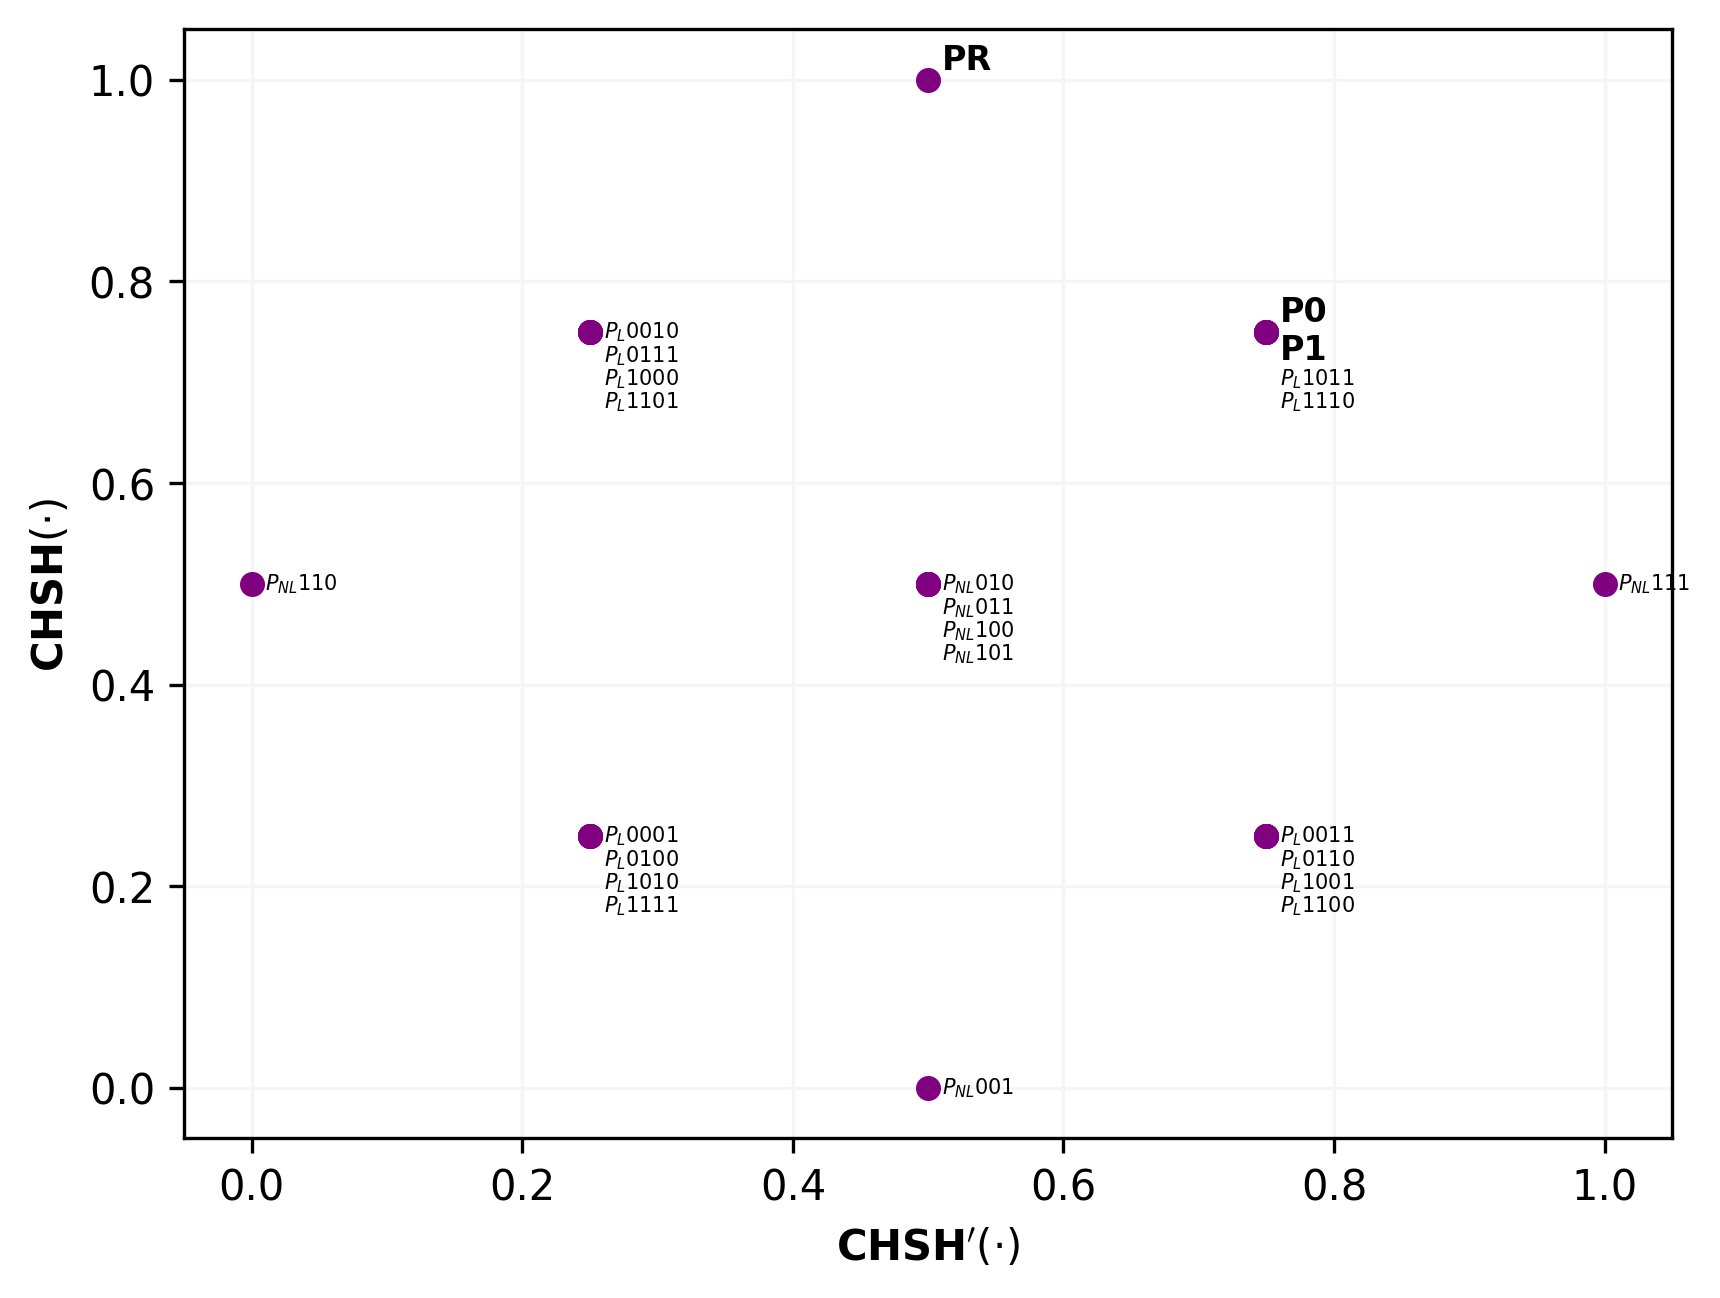

In [6]:
plot_games(
    game1=CHSHp, 
    name1="$\mathbf{CHSH}'(\cdot)$", 
    game2=CHSH, 
    name2="$\mathbf{CHSH}(\cdot)$"
    )

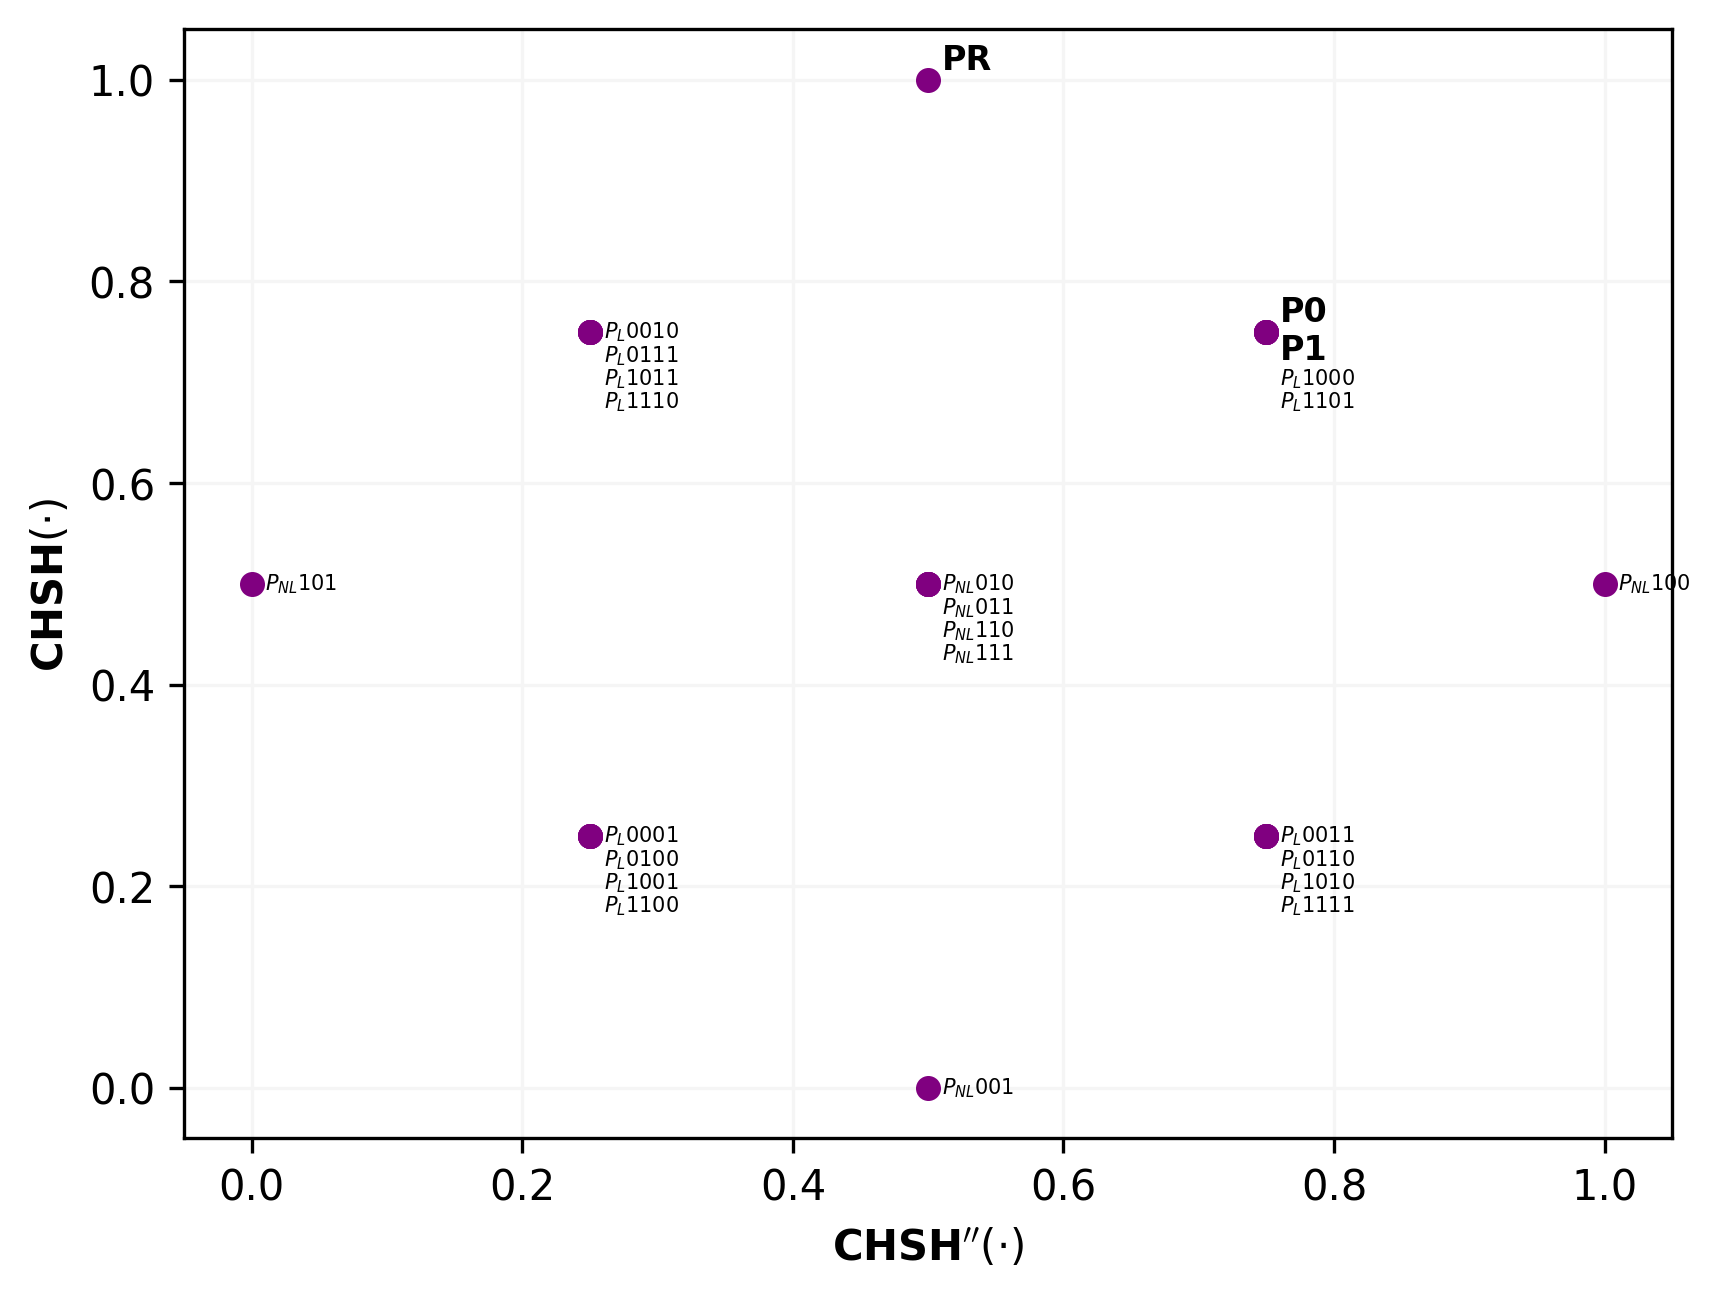

In [7]:
CHSHpp = game(lambda a,b,x,y: (a+b)%2 == (x)*(y+1)%2)

plot_games(
    game1=CHSHpp, 
    name1="$\mathbf{CHSH}''(\cdot)$", 
    game2=CHSH, 
    name2="$\mathbf{CHSH}(\cdot)$"
    )

# Try to separate P0 from P1

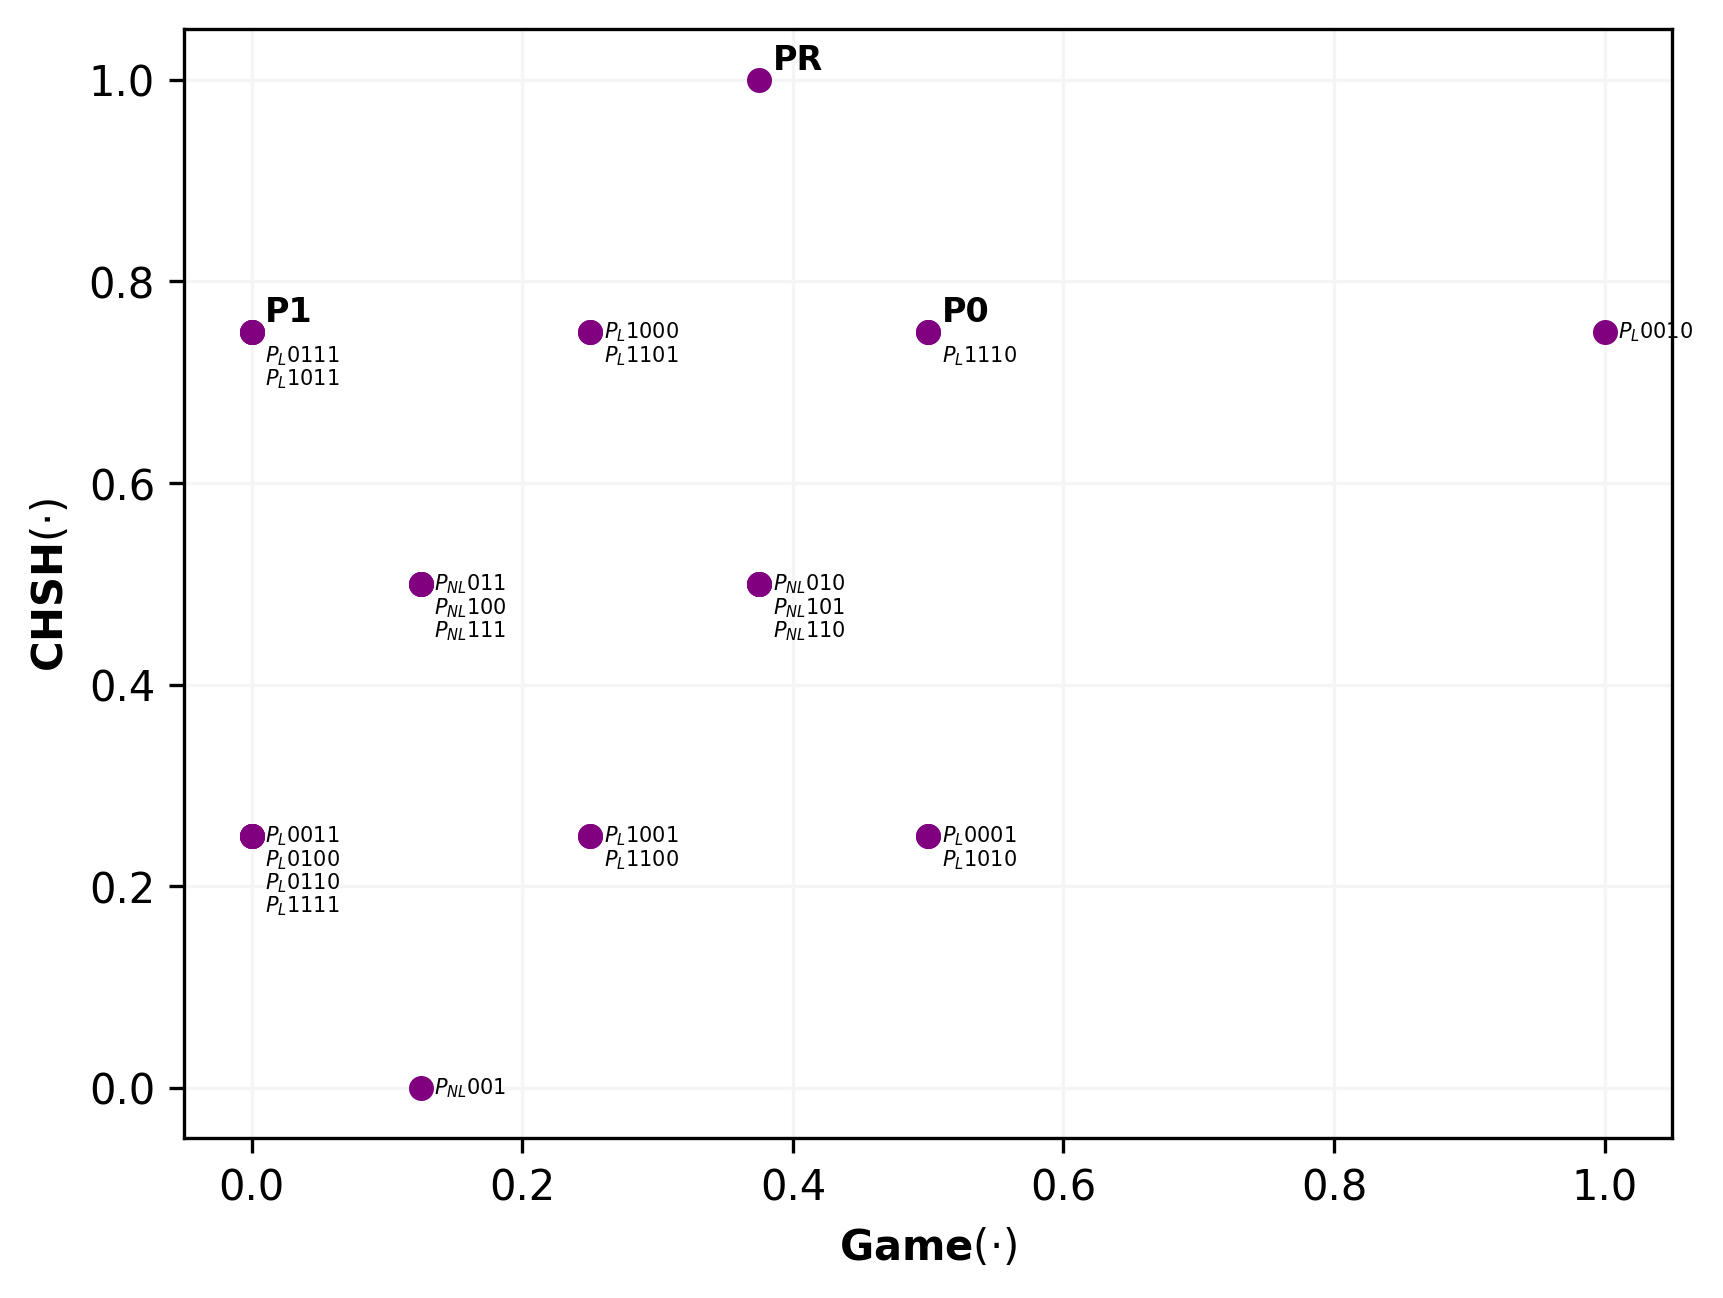

In [42]:
Game = game(lambda a,b,x,y: a == (0*x+0)%2 and b == (1*y+0)%2)

plot_games(
    game1=Game, 
    name1="$\mathbf{Game}(\cdot)$", 
    game2=CHSH, 
    name2="$\mathbf{CHSH}(\cdot)$"
    )